In [2]:
#!pip install statsmodels

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

Create Sample Data

In [4]:
np.random.seed(123)
nsample = 50
x = np.linspace(0, 20, nsample)

In [8]:
# Add constant 1 turn into matrix
X = sm.add_constant(x)

In [9]:
# b0: constant, b1: X1 coefficient
beta = [1, 2.5]

In [10]:
# Random error
e = np.random.normal(size=nsample)

In [12]:
y = np.dot(X, beta) + e

In [18]:
sample_df = pd.DataFrame({"y": y, "x1": x})
sample_df.head()

,y,x1
0,-0.085631,0.000000
1,3.017754,0.408163
2,3.323795,0.816327
3,2.554930,1.224490
4,4.503032,1.632653


<AxesSubplot: xlabel='x1', ylabel='y'>

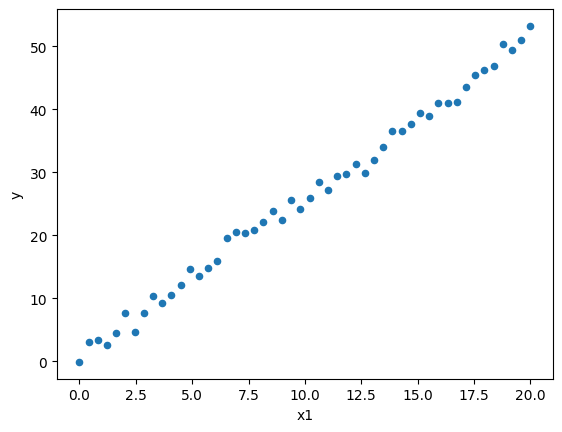

In [21]:
sample_df.plot.scatter("x1", "y")

Calculate Pearson Coefficients

In [25]:
corr_matrix = sample_df.corr(method='pearson')
print(corr_matrix)

          y       x1
y   1.00000  0.99683
x1  0.99683  1.00000


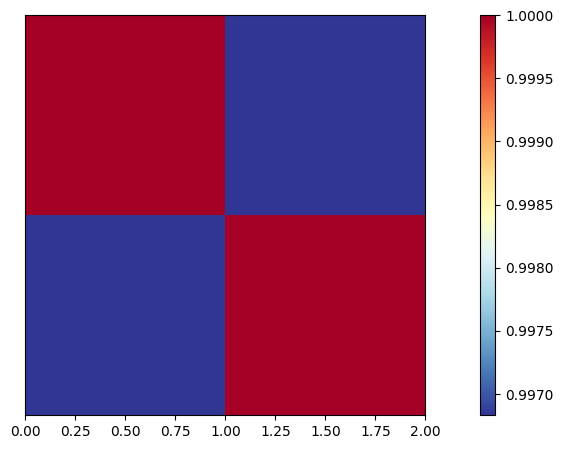

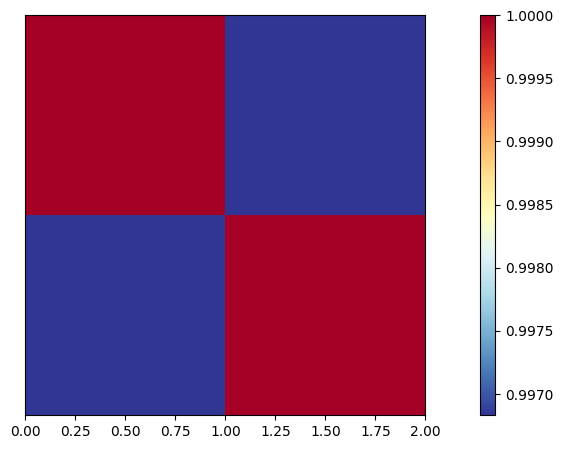

In [27]:
sm.graphics.plot_corr_grid([corr_matrix])

Simple Linear Regression

In [30]:
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     7535.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           1.97e-54
Time:                        15:37:00   Log-Likelihood:                -79.405
No. Observations:                  50   AIC:                             162.8
Df Residuals:                      48   BIC:                             166.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8224      0.337      2.442      0.0

In [32]:
result.params

array([0.82244348, 2.5190828 ])

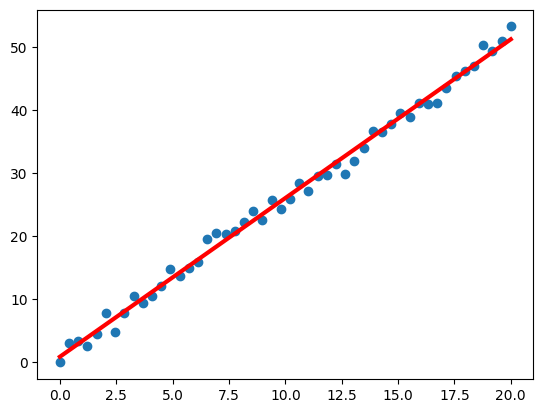

In [38]:
plt.scatter(x, y)

# get slope and intercept(constant)
b0, b1 = result.params[0], result.params[1]

# Draw regression line
plt.plot(x, b0 + b1*x, color='red', lw=3)